In [1]:
# generating poisson distribution sample of size 1000
# random demand and store it in sample
import numpy as np
np.random.seed(1)
mean_value = 7
sigma = 2
demand_size = 1000
#demand_sample = np.random.normal(mean_value,sigma,demand_size) # normal distribution
demand_sample = np.random.poisson(mean_value,demand_size)  # poisson distribution
print(demand_sample)

[ 2  3  7  8  4  9  9  3  4  6  9 11 10  2  9  8  1  6  6  7  3  2  9  4
  7  7  6  7 13  5  4 11  6  7  1 15  9 11  7  7  8  7  4  8 13 10  9  3
  9  5  7  8  7  6  3 10  3  6  9  4  9  4  8 11  4  7 12  5  7  5  8  5
  7  5  8  9  4  5 11  5 12  6  4  5  5  7  8  5  7  7  6  9 11 11  4 11
  6  3  9 10  9 10  5  7  6  6  7  7 12  4  4  6  6 10  5  6  7  7  5  7
  3  5  9  9  6  9 11  4  6  5  8  4  5 11  8  7 12  4 10  3 10  4  6  7
  7 11  7  7  5 11  8 12  3 10  4  7  0  8  8  7  7  4  4  8 10  8 11  5
  7 11  3  7  9  3  8  5 15  6  5  5  9  7  6  7  5  1  5  7  9 10  6  6
  9  2  7  4  5 15  7  6  7 12  7  6 10  9  9  8 10 13  3  7 11  7  8  8
  8 11  5  4  5 10 16  9  8  7  7  5 12  6  6 10 11  5  6  8  5  9 10  7
  8 10  6  4  8  6  7  8  5 11  7  6  5  9  3  2  6  5  7  7 10  9  8  7
  6  6  6  2  6  5  6 11  4  4  9  9  6  2 10  4  9  9  4 16  6  6 12  7
  7 11 12  6  8  3  4  4  9  2  4 10  5  1  5  6  6  6 10  6 10  5  4  6
 10  6  4  9  8  6  6  5  7  4  6  3  6  4  5  7  6

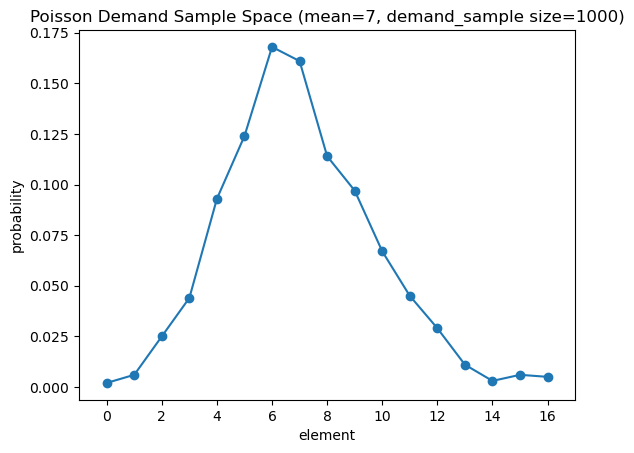

In [2]:
import matplotlib.pyplot as plt
# counts elements from 0 to maximum present in sample
element_counts = np.bincount(demand_sample)
# calculating probability
probabilities = element_counts/demand_size;
min_element = np.min(demand_sample)
max_element = np.max(demand_sample)
#since index starts from 0
plt.plot(range(len(probabilities)), probabilities, marker='o', linestyle='-')
plt.xlim(min_element-1, max_element+1)
plt.xlabel('element')
plt.ylabel('probability')
plt.title(f"Poisson Demand Sample Space (mean={mean_value}, demand_sample size={demand_size})")
plt.show()

Text(0.5, 1.0, 'Approximated expected function plot after 1000 iterations')

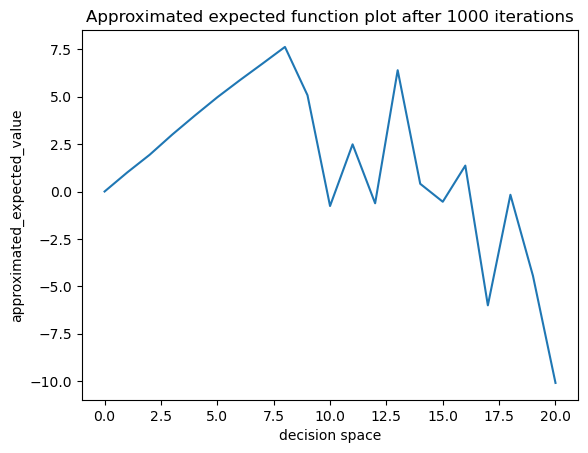

In [3]:
num_iterations = 1000;
q = 2; # selling price
c = 1; # cost price
decision_space = list(range(0,21)) # containing probable decision space 0 to 20
# creating function as a dictionary where index as x and value of function(expected value)
f = {}
for x in decision_space:
    f[x]=0 # assigning 0 value initially

for i in range(num_iterations):
    x = np.random.choice(decision_space)
    d = np.random.choice(demand_sample)
    value = q*np.min([x,d]) - c*x
    f[x] = np.mean([f[x],value])

    

plt.plot(f.keys(),f.values())
plt.xlabel('decision space')
plt.ylabel('approximated_expected_value')
plt.title(f'Approximated expected function plot after {num_iterations} iterations')


Text(0.5, 1.0, 'true expected function plot')

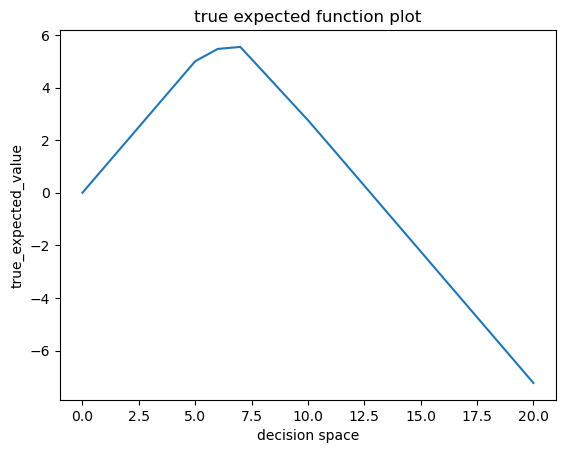

In [4]:
## true expected value function

q = 2; # selling price
c = 1; # cost price
decision_space = list(range(0,21)) # containing probable decision space 0 to 20
# creating function as a dictionary where index as x and value of function(expected value)
f = {}
for decision in decision_space:
    f[decision]=0 # assigning 0 value initially

for decision in decision_space:
    for demand in demand_sample:
        value = q*np.min([decision,demand]) - c*decision
        f[decision] = np.mean([f[decision],value])

plt.plot(f.keys(),f.values())
plt.xlabel('decision space')
plt.ylabel('true_expected_value')
plt.title(f'true expected function plot')    


# Value function approximation with slope

In [5]:
# projection function

def projection(Z, V, s, M,B):
    found = 0 # flag whether extreme points are hit
    # if left slope is smaller than updated slope of sampled point s

    if Z[s - 1] < Z[s]:
        # find maximum i such that average value to right is less than or equal to slope at i-1
        for i in range(s, 0, -1):
            # c is average value to slopes from i to s
            c = 1 / (s - i + 1) * sum(value for key, value in Z.items() if i <= key <= s)
            if Z[i - 1] >= c:
                # if such condition is met, no need to go futher left for averaging
                found = 1
                break
                # updating the slopes from i to s and equating all to same value as c
        # if no left point is found until 1, assign i = 0
        # as slope will update from 1 to s
        if found == 0:
            i = 0
        for j in range(i, s + 1):
            if found == 0:
                # sum to rom s to i=1
                c = 1 / (s - 0 + 1) * sum(value for key, value in Z.items() if 0 <= key <= s)
                # if i =1, equate to minimum of some large number and average value
                V[j] = min(B, c)
            else:
                V[j] = c

    # if right side point slope is larger than updated slope of sampled point s
    elif Z[s] < Z[s + 1]:
        for i in range(s, M, 1): # from i = s to M-1 is iterated
            c = 1 / (i - s + 1) * sum(value for key, value in Z.items() if s <= key <= i)
            if Z[i + 1] <= c:
                found = 1
                break
        if found == 0:
            i = M

        # updating slopes of points (s,i) to average value
        for j in range(s, i + 1):
            if found == 0:
                # sum to from s to i= M
                c = 1 / (M - s + 1) * sum(value for key, value in Z.items() if s <= key <= M)
                V[j] = max(-B, c)
            else:
                V[j] = c
    else:
        None
    return V



In [10]:
# function calculating approximated value using slope information

def value_calc_using_slope(V,decision_space):
    # f is approximated value calculated using slopes
    f_approx = {}
    for x in decision_space:
        if x == 0:
            f_approx[x] = 0
        else:
            f_approx[x] = sum(value for key, value in V.items() if 0 <= key < x)
            
    # plotting approximated function        
    #plt.plot(f_approx.keys(),f_approx.values())
    #plt.xlabel('decision space')
    #plt.ylabel('approximated_expected_value')
    #plt.title(f'plot of approximated expected function using slope')
    #plt.show()
    return f_approx

In [11]:
# function calculating exact expected value
def expected_value_calc_exact(decision_space, demand_sample, q, c):
    f_exact = {}
    for decision in decision_space:
        f_exact[decision]=0 # assigning 0 value initially

    for decision in decision_space:
        for demand in demand_sample:
            value = q*np.min([decision,demand]) - c*decision
            f_exact[decision] = np.mean([f_exact[decision],value])

    #plt.plot(f_exact.keys(),f_exact.values())
    #plt.xlabel('decision space')
    #plt.ylabel('true_expected_value')
    #plt.title(f'true expected function plot')
    #plt.show()
    return f_exact

In [12]:
# Plotting expected value of exact and approximated functions
def plot_functional_value(f_approx, f_exact):
    plt.plot(f_approx.keys(), f_approx.values(), label = 'Approximated expected value using slope')
    plt.plot(f_exact.keys(), f_exact.values(), label = 'Exact expected function value')
    plt.legend()


    plt.xlabel('decision space')
    plt.ylabel('expected_value')
    plt.title(f' Exact and approximated expected function plot')
    plt.show()

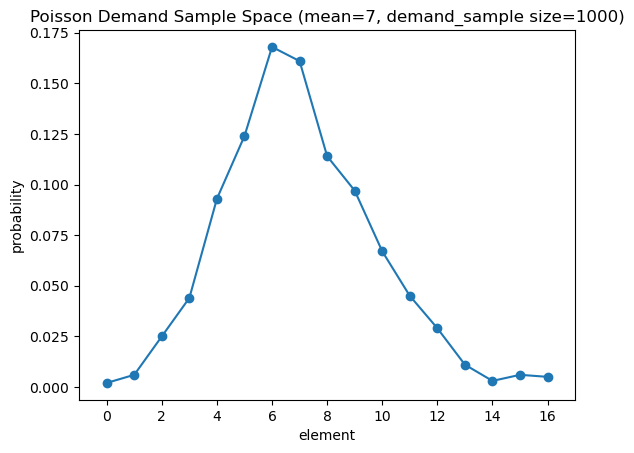

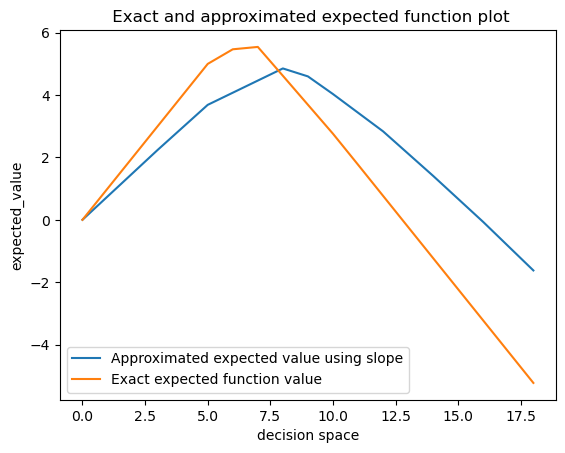

In [15]:
# importing modules
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import copy

# for reproducibility
np.random.seed(1)
# Parameters initialization
# number of iterations
num_iterations = 100;
B = 1000 # some big number for extreme slope
# for demand
demand_size = 1000
mean_value = 7
sigma = 2

q = 2; # selling price 6 2   100
c = 1; # cost price 4  1     75

# probable decision space 0 to 20
M = 18; # decision limit
decision_space = list(range(0,M+1))

# Generate  Demand Samples
#demand_sample = np.random.normal(mean_value,sigma,demand_size) # normal distribution
demand_sample = np.random.poisson(mean_value,demand_size)  # poisson distribution

# Plotting demand samples
# counts elements from 0 to maximum present in sample
element_counts = np.bincount(demand_sample)
# calculating probability
probabilities = element_counts/demand_size;
min_element = np.min(demand_sample)
max_element = np.max(demand_sample)
#since index starts from 0
plt.plot(range(len(probabilities)), probabilities, marker='o', linestyle='-')
plt.xlim(min_element-1, max_element+1)
plt.xlabel('element')
plt.ylabel('probability')
plt.title(f"Poisson Demand Sample Space (mean={mean_value}, demand_sample size={demand_size})")
plt.show()
######################################################################
# Learning starts
######################################################################
# initializing slope vector V
# Size of V will be equalt o probable decision space size
# assigning 0 value initially
V = {}
for x in decision_space:
    V[x]=0

# initializing B and -B as slope for left extreme and right extreme end
V[-1] = B
V[M+1] = -B
Z = copy.copy(V)
# iterations starts for learning
for k in range(num_iterations):
    s = np.random.choice(decision_space)
    d = np.random.choice(demand_sample)
    # calculate slope as
    if s <= d:
        eta = q-c
    else:
        eta = -c
    alpha = 20/(40+k) # from powell's paper
    #alpha = 20/(40+1) 
    # update Z vector
    for x in decision_space:
        # update slope at sample decision point only
        if x == s:
            Z[x] = (1-alpha)*V[x] + alpha*eta
        else:
            Z[x] = V[x]
    V = projection(Z,V,s,M,B)
f_approx = value_calc_using_slope(V, decision_space)
f_exact = expected_value_calc_exact(decision_space, demand_sample, q, c)
plot_functional_value(f_approx, f_exact)



In [24]:
q=2
c = 1
decision = 5
demand = 9
q*np.min([decision,demand]) - c*decision
np.mean([4,6])

5.0

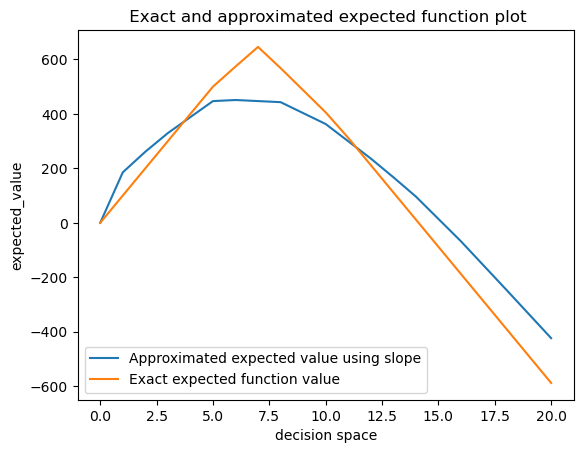

In [17]:
plot_functional_value(f_approx, f_exact)